/var/folders/r1/skpy3tz95c139r2l46446f5c0000gn/T/ipykernel_86499/127763238.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


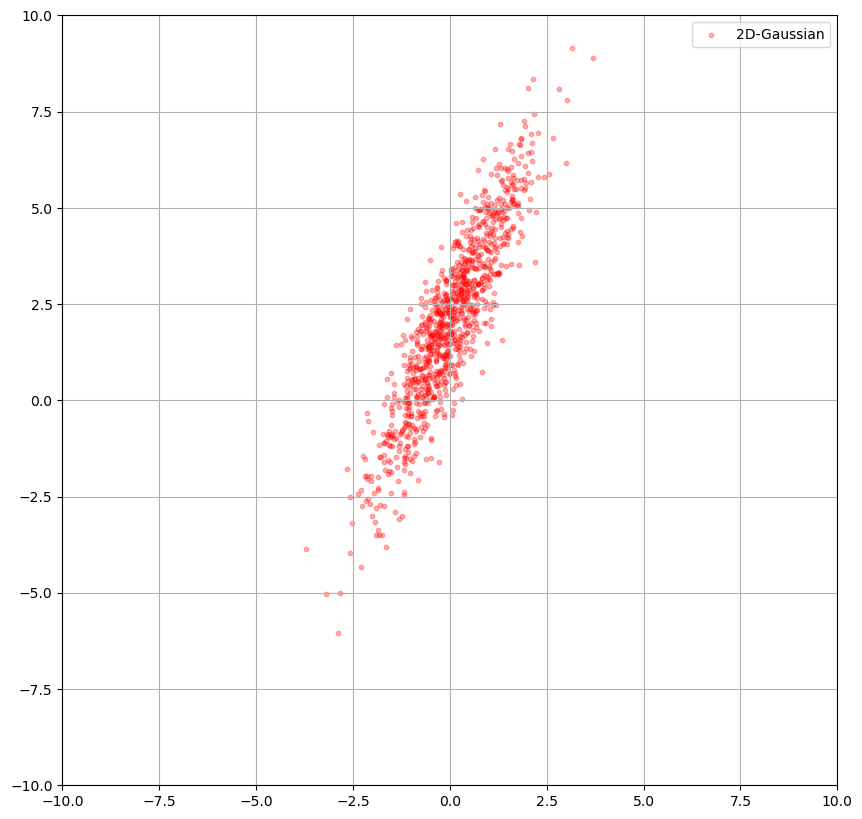

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# This is similar to the code from lecture 1
# to sample from a 2D Gaussian Distribution
mean = [0,2]
cov = [[1, 2], [2, 5]]
# Fix random seed to get consistent results
np.random.seed(1024)
X = np.random.multivariate_normal(mean, cov, 1000)
fig, ax = plt.subplots(figsize=(10, 10))
# c='r', dot color is red
# s=10.0, dot size is 10
# alpha=0.3, dot opacity is 0.3
ax.scatter(X[:,0], X[:,1], c='r', s=10.0, alpha=0.3, label="2D-Gaussian")
ax.grid()
ax.legend(loc = 0)
# Set x/y axis limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
fig.show()

In [46]:
# TODO: Report the estimate mean and covariance
# of the sampled points
samplemean= np.mean(X, axis=0)
covariance= np.cov(X, rowvar= False)
print(samplemean)
print(covariance)

[0.01909265 2.06052385]
[[1.03589238 2.06244165]
 [2.06244165 5.08839176]]


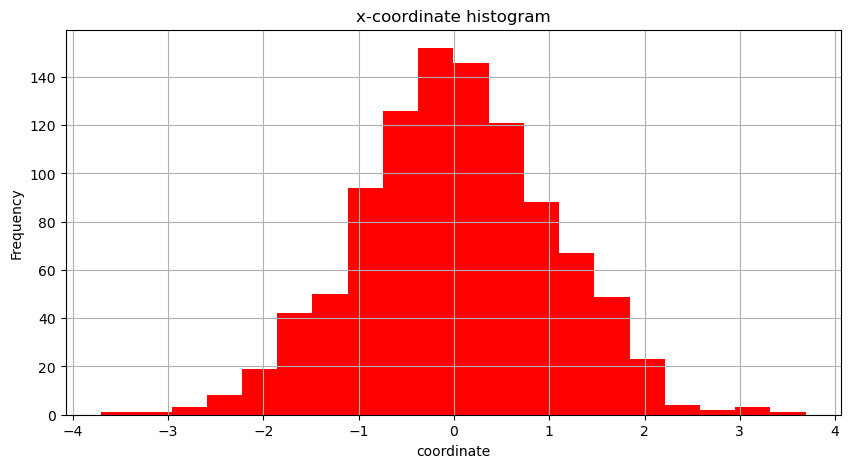

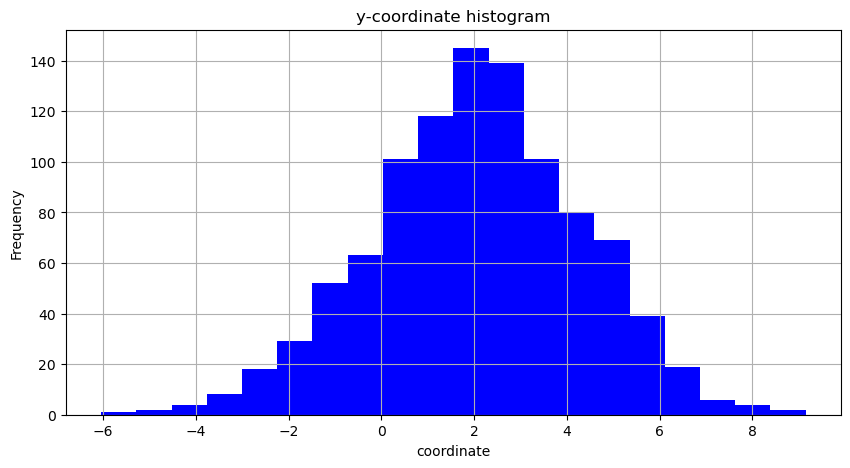

In [54]:
# TODO: Plot the histogram for the x-coordinates of X
# and y-coordinates of X respectively.
# You can use the plt.hist() function
plt.figure(figsize=(10, 5))
plt.hist(X[:, 0], bins=20, color='red', alpha=1)
plt.title('x-coordinate histogram')
plt.xlabel('coordinate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(X[:, 1], bins=20, color='blue', alpha=1)
plt.title('y-coordinate histogram')
plt.xlabel('coordinate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




X mean: 0.019092651459051646
X variance: 1.0348564864741474
Y mean: 2.0605238541899022
Y variance: 5.083303371449154


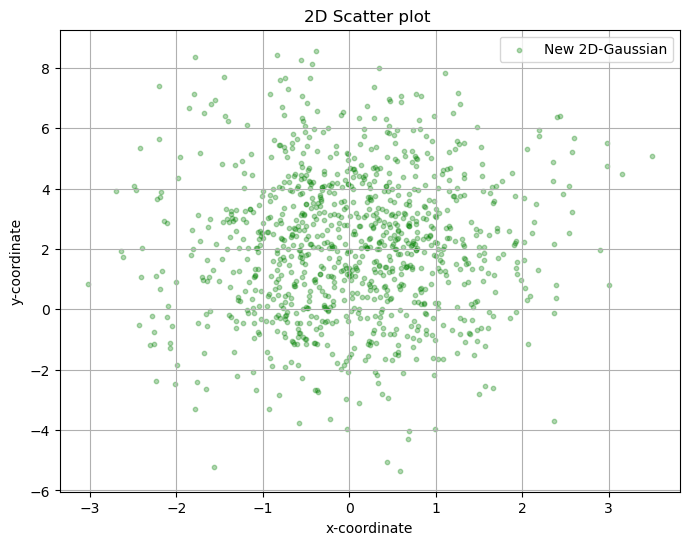

In [51]:
# TODO: Are the x-coordinates of X samples from
# some Gaussian distribution?
# If so, estimate the mean and variance.
# Do the same for the y-coordinates.
#while there a some gaussian characteristics, we can still see some asymmetry and irregularities in both graphs
#if we calculate the mean and variance, this could help us see if this is actually Gaussian
meanx= np.mean(X[:, 0])
varx= np.var(X[:, 0])
print('X mean:', meanx)
print('X variance:', varx)

meany= np.mean(X[:, 1])
vary= np.var(X[:, 1])
print('Y mean:', meany)
print('Y variance:', vary)

#Generally, the histograms follow a Gaussian distribution. 
#While not looking perfectly symmetrical, the data roughly aligns for a Gaussian distribution

# TODO: Generate a new 2D scatter plot of 1000 points,
# such that the x-coordinates(y-coordinates) of all the points
# are samples from a 1D Gaussian distribution 
# using the estimated mean and variance based on the x-coordinates(y-coordinates) of X.
samplesx = np.random.normal(meanx, np.sqrt(varx), 1000)
# Sample 1000 numbers from 1D Gaussian distribution for y-coordinates
samplesy = np.random.normal(meany, np.sqrt(vary), 1000)

# Create a new scatter plot with the new samples
plt.figure(figsize=(8, 6))
plt.scatter(samplesx, samplesy, c='g', s=10.0, alpha=0.3, label="New 2D-Gaussian")
plt.grid()
plt.legend(loc=0)
#plt.xlim(-10, 10)
#plt.ylim(-10, 10)
plt.title('2D Scatter plot ')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

#The new scatterplot is quite different from the original, 
#as we can see that the samples were taken randomly and independetly from each other yet still followed close to the y and x mean.



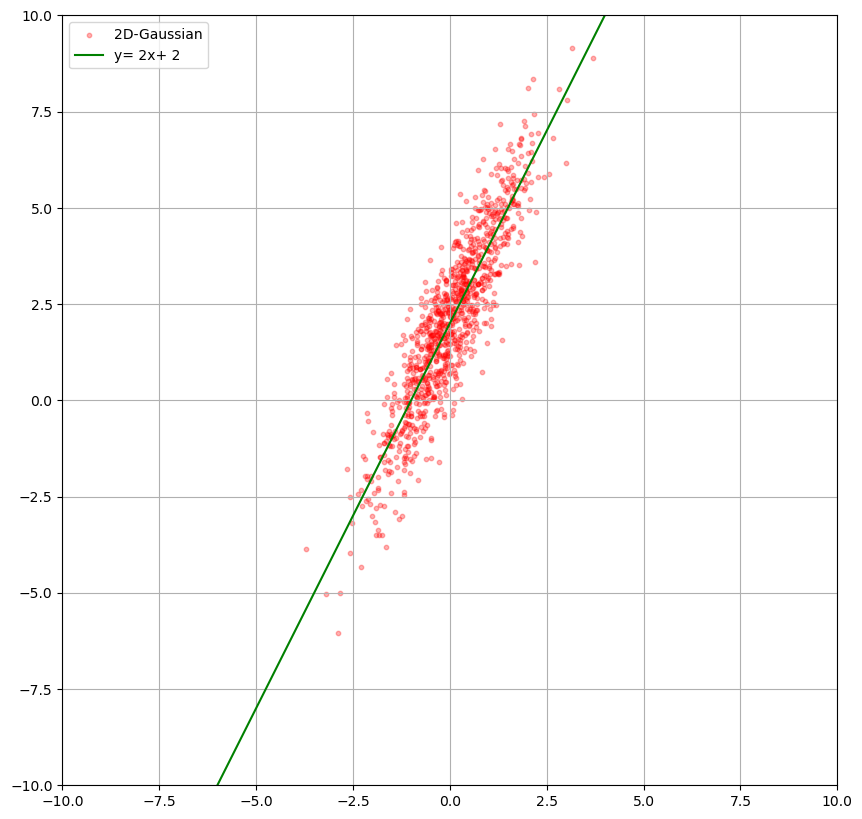

In [52]:
# Back to the original X
fig, ax = plt.subplots(figsize=(10, 10))
# c='r', dot color is red
# s=10.0, dot size is 10
# alpha=0.3, dot opacity is 0.3
ax.scatter(X[:,0], X[:,1], c='r', s=10.0, alpha=0.3, label="2D-Gaussian")
ax.grid()
ax.legend(loc = 0)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

# TODO: Plot a line segment with x = [-10, 10]
# and y = 3x + 1 onto the 2D-Gaussian plot.
# The np.linspace() function may be helpful.

#the assignment doc mentions y=2x+2 so I used that equation instead
xvalues = np.linspace(-10, 10, 100)
yvalues = 2 * xvalues + 2
ax.plot(xvalues, yvalues, color='green', label='y= 2x+ 2')
#(this is to include the equation definition on the graph)
ax.legend(loc='upper left')

plt.show()



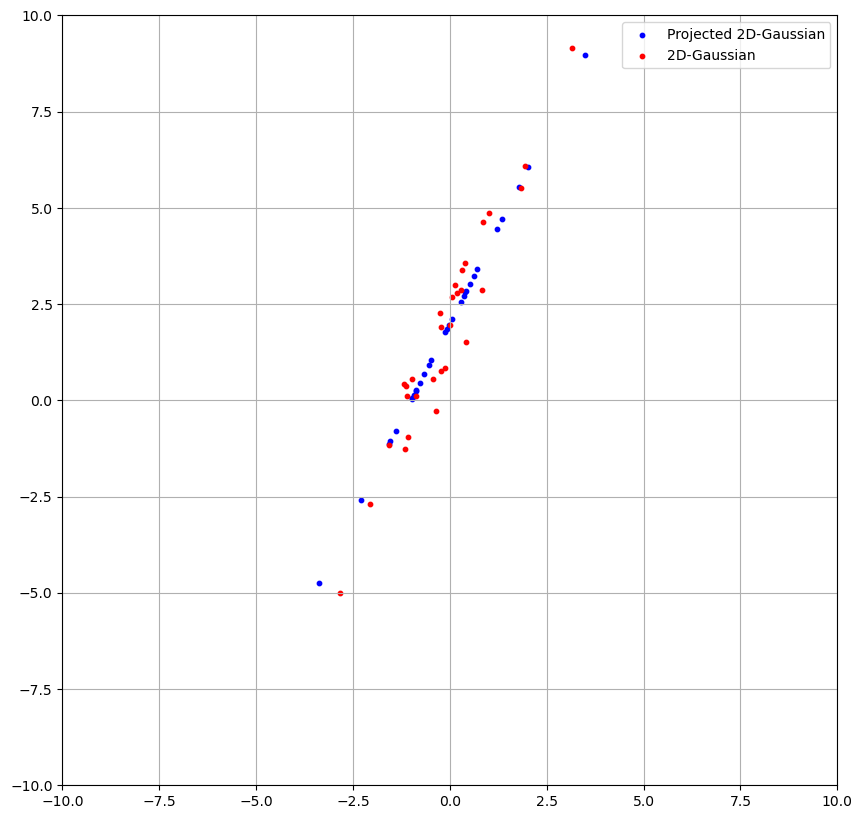

In [36]:
# TODO: Project X onto line y=2x + 2
# and plot the projected points on the 2D space.
# You need to remove this line and assign the projected points to X_proj.
#X_proj = np.zeros(X.shape)
slope = 2
intercept = 2
perpendicular = -1 /slope

interceptsY = X[:, 1] - perpendicular * X[:, 0]

intersectionsX = (interceptsY - intercept) / (slope - perpendicular)

intersectionsY = slope * intersectionsX + intercept

# Assign projected points to X_proj
X_proj = np.column_stack((intersectionsX, intersectionsY))

ax.scatter(X_proj[:, 0], X_proj[:, 1], c='green', s=10.0, alpha=0.5, label="Projected points")
ax.legend(loc='upper left')

plt.show()


# Here we only plot 30 points to check the correctness
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_proj[:30,0], X_proj[:30,1], c='b', s=10.0, alpha=1.0, label="Projected 2D-Gaussian")
ax.scatter(X[:30,0], X[:30,1], c='r', s=10.0, alpha=1.0, label="2D-Gaussian")
ax.grid()
ax.legend(loc = 0)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
# You can also add the line from the previous plot for verification.
plt.show()

#note: fig.show() gives me an error so I changed these to plt and it seems to be fine


In [ ]:
# TODO: Draw the histogram of the x-coordinates
# of the projected points.
# Are the x-coordinates of the projected points
# samples from some Gaussian distribution?
# If so, estimate the mean and variance.

#After plotting the histogram, we can see that the graph is relatively symmetrical


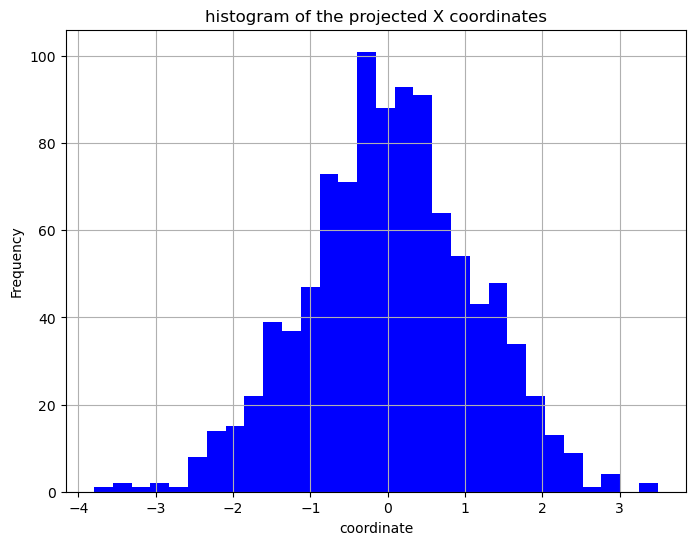

Y mean: 0.028028071967771222
Y variance: 1.1843834728271614


In [56]:
X_proj_coords= X_proj[:, 0]
plt.figure(figsize=(8, 6))
plt.hist(X_proj_coords, bins=30, color='blue', alpha=1)
plt.title('histogram of the projected X coordinates')
plt.xlabel('coordinate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

meanX_proj= np.mean(X_proj_coords)
varX_proj= np.var(X_proj_coords)
print('Y mean:', meanX_proj)
print('Y variance:', varX_proj)

#we can see that the mean calculated is similar to the one from the very beginning of this project
#the estimated x mean at the beginning was inputted as 0, and then calcualted to around 0.019
#the mean presented now is around 0.028 which is very similar 
#depending on the margin of error considered, we can say that the histogram is relatively Gaussian, 
#yet the lack of symmetry (which does not improve if we change bins) 
#disproves that this is a full Gaussian distribution
